<a href="https://colab.research.google.com/github/enes-karatas/AI_ML_test/blob/main/Deep_Learning_Project_Lending_Club_Loan_Default_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lending Club Loan Default Risk Prediction Project

###Project Insight :  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans.

Objective: Create a model that predicts whether or not a loan will be default using historical data.

Dataset : https://drive.google.com/drive/folders/1oR3XCim3XrdrNBxbJ3MjLE-qJrSkVcuR


### Summary :
- Predicted customer's future loan default risk using historical loan data (2007–2015) using deep learning model.
- Conducted EDA, feature engineering and model development; built and tuned deep learning models to improve prediction accuracy.


### Dataset Columns :
- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
- installment: The monthly installments owed by the borrower if the loan is funded.
- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- dti: The debt-to-income ratio of the borrower (the amount of debt divided by annual income).
- fico: The FICO credit score of the borrower.
- days.with.cr.line: The number of days the borrower has had a credit line.
- revol.bal: The borrower's revolving balance (the amount unpaid at the end of the credit card billing cycle).
- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
- delinq.2yrs: The number of times the borrower has been 30+ days past due on a payment in the past 2 years.
- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
- not.fully.paid: is customer not fully paid

--------------------------------------------------------------------------------

#Contents

###1. Data Preparation & Analysis
- 1.1. Data Preperation & Analysis Report

###2. Feature Engineering and Exploratory Data Analysis (EDA)
- 2.1. Feature Engineering and Exploratory Data Analysis Report

###3. Model Building
- 3.1. HyperTuning Implementation for Best Model Selection
- 3.2. Model Building Report

###4. Model Evaluation Analysis
- 4.1. ROC/AUC and Confusion Matrix Analysis
- 4.2. Model Evaluation Analysis Report

###5. Final Report

--------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#%pip install keras-tuner

#1. Data Preparation Analysis

In [ ]:
# Coping csv file to df_raw dataframe
df_raw = pd.read_csv('loan_data.csv')
# Making copy from raw dataframe
df = df_raw.copy()

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.shape
# 14 columns and 9578 raws are in the dataset

(9578, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()
# No null values found

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


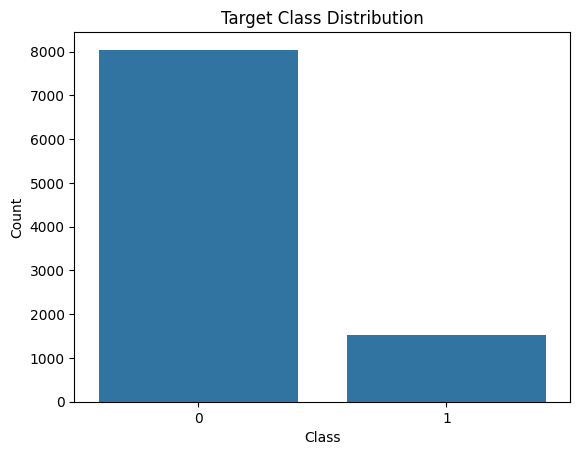

,count
not.fully.paid,
0,8045
1,1533


In [ ]:
# Checking data imbalance

sns.countplot(x=df['not.fully.paid'])
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

df['not.fully.paid'].value_counts()
# Value '0' for our target columns is almost 5 time greater than value '1', we need to resolve this imbalance before model training
# I'll use SMOTE in future steps to fix imbalance

## 1.1. Data Preperation & Analysis Report :  
- 14 columns and 9578 raws exist in the dataset
- No null values obtained in dataset
- Column 'not.fully.paid' is our target column
- There is imbalance in dataset, amount of '0' in target column is almost five times greater than amount of '1', imbalance in dataset will be resolved with Smote in future steps

#2. Feature Engineering and Exploratory Data Analysis (EDA)

In [ ]:
df.head(3)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0


In [ ]:
# One-hot encoding for categorical 'purpose' column
df_encoded = pd.get_dummies(df, columns=['purpose'], drop_first=True)

# Boolean values converted to 0 and 1 to make them suitable for model training
boolean_columns = df_encoded.select_dtypes(include='bool').columns
df_encoded[boolean_columns] = df_encoded[boolean_columns].astype(int)

In [ ]:
df_encoded.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


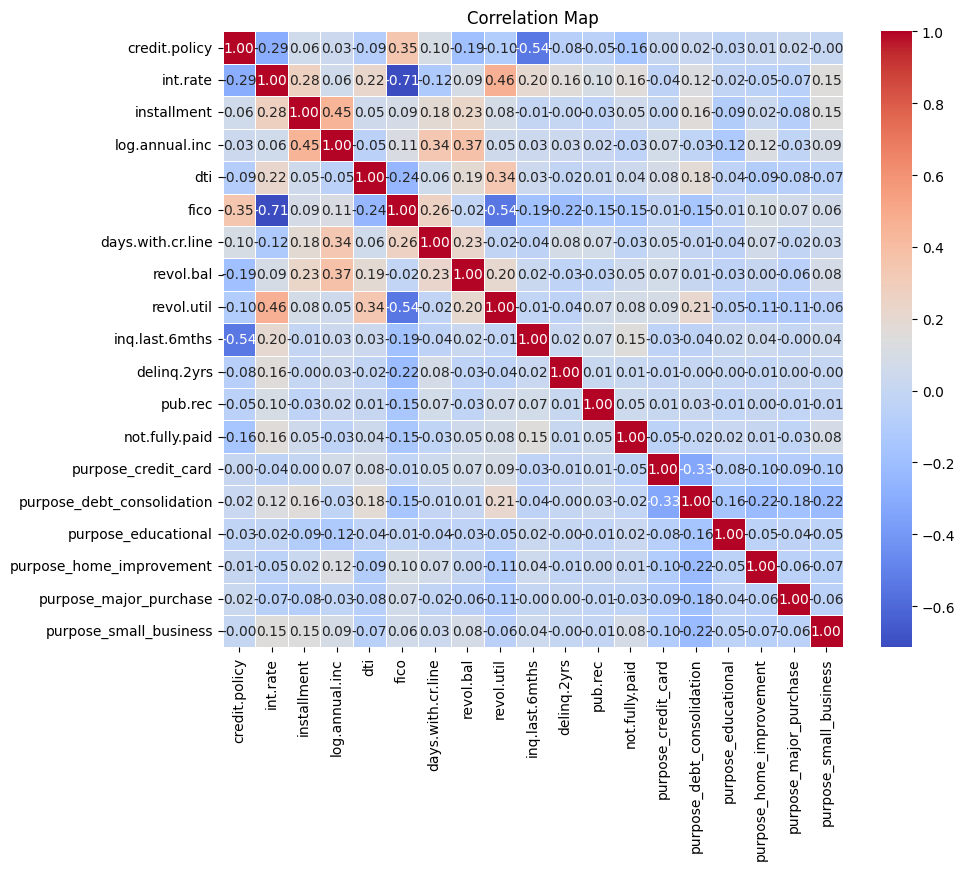

In [ ]:
# Creating correlation matrix heat map to see correlation between columns
corr_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

# There is no highly correlated(>85%) feature found.
# There is 46% correlation between interest rate and revolving line utilization rate
# There is 45% correlation between annual income and interes rate
# There is negative 71% correlation between interest rate and fico score
# There is negative 54% correlation between credit policy and inquiries in last 6 months

In [ ]:
df_encoded.shape

(9578, 19)

In [ ]:
# Setting threshold rule to remove highly correlated features for practice purposes
threshold = 0.8
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df_reduced = df_encoded.drop(columns=to_drop)

df_reduced.shape

# There is no highly correlated(>80%) feature in dataset, no feature will be dropped from dataset.

(9578, 19)

###Note : I've removed Fico and Interest Rate columns once since they're highest correlated in this dataset. Removing those feature effected accuracy result in bad way so I skipped 'Drop correlated feature' part in project and I kept those feature for my model.

In [ ]:
df_reduced.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Scaling dataset for numeric columns and making model ready dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Listing Scale needed numeric columns
scale_req_columns = ['int.rate' , 'installment' , 'log.annual.inc' , 'dti' , 'fico' , 'days.with.cr.line' , 'revol.bal' , 'revol.util' ]
# Listing No scale needed columns, binary columns
df_not_scaled = df_encoded.drop(columns=scale_req_columns)

# Scaling numeric columns and putting scaled data in new df_scaled dataset
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded[scale_req_columns]) , columns=df_encoded[scale_req_columns].columns)

# Concatinating scaled and non scaled(binary)
df_processed = pd.concat([df_scaled, df_not_scaled], axis=1)

# Dataset now scaled and ready for model as df_processed
df_processed.head(3)


,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,credit.policy,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.43223,0.353732,0.182704,1,0,0,0,0,0,1,0,0,0,0
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.72123,0.495018,1.030602,1,0,0,0,0,1,0,0,0,0,0
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.05977,-0.397073,-0.730683,1,1,0,0,0,0,1,0,0,0,0


In [ ]:
df_processed['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


##2.1. Feature Engineering and Exploratory Data Analysis Report :
- One-hot encoding applied for categorical 'purpose' column and boolean values converted to 0&1 to make column suitable for model training
- Correlation matrix based heatmap created to see how features correlated. Highly correlated columns should be removed to help model learn in general data but no highly correlated features found
- -  There is no highly correlated(>85%) feature found.
- -  There is 46% correlation between interest rate and revolving line utilization rate
- -  There is 45% correlation between annual income and interes rate
- -  There is negative 71% correlation between interest rate and fico score
- -  There is negative 54% correlation between credit policy and inquiries in last 6 months
- All columns scaled with StandardScaler, preprocessed dataset is ready for model training.

#3. Model Building


In [ ]:
import numpy as np
import pandas as pd
import time
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Determining Feature and Target data
X = df_processed.drop('not.fully.paid', axis=1) # Features
y = df_processed['not.fully.paid'] # Target

# Using SMOTE to fix dataset imbalance
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Just checking if imbalance fixed or not, values is 8045 for both '0' and '1'
print(y.value_counts())
print(y_sm.value_counts())

# Splitting dataset to train and test portions, splitting it to 80%-20% datasets (Syntetic data included)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

# Using class weights to fight dataset imbalance
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight = dict(zip(classes, weights))

# Creating early stopping to prevent overfitting, this will stop learning once it reaches good validation loss rate
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X.shape[1],)), # Fully connected hidden layer with 64 neurons, relu used as activation function, input shape defined here
        layers.Dropout(0.3), # Dropping 30% of neurons randomly to prevent overfitting
        layers.Dense(32, activation='relu'), # Hidden layer with 32 neurons, activation funtion is relu
        layers.Dropout(0.3), # Dropping 30% of neurons randomly to prevent overfitting
        layers.Dense(1, activation='sigmoid') # Output layer with 1 neuron and sigmoid activation function since we want binary classification output
])

optimizer_adam = Adam(learning_rate=0.001) # Adam optimizer created here to be able to tune learning rate

model.compile(
    optimizer=optimizer_adam,             # Adam used as optimizer
    loss='binary_crossentropy',           # 'binary_crossentropy' used as loss function, it is suitable for binary targets
    metrics=['accuracy']                  # Track accuracy during training
)


# Early stoppage added in any case of need but even with 300 epochs no auto cut used.
# I've used Smote and class weight techniques to balance the data, before smote applied accuracy on test results was awful, after balancing results became better
# Before Smote data imbalance was 0-8045 , 1-1533. After Smote dataset became 0-8045 , 1-8045 with syntetic data added
# I've tried more layer in funnel , didn't give good results, I kept
# I've tried more neurons, and less neurons, so far I got the best results with 64-32-1
# I've tried dropping different percentages of neurons, so far I got the best results with 0.3
# I've tried various values for Adam optimizer, so far I got the best results with 0.001 learning rate
# I've used relu activation function in hidden layers, I used sigmoid function in output since we're looking for binary output


not.fully.paid
0    8045
1    1533
Name: count, dtype: int64
not.fully.paid
0    8045
1    8045
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model training

model_train = model.fit(
    X_train,
    y_train ,
    validation_data = (X_test, y_test),
    epochs=100 , # 300 epochs is selected, more epochs does not improve accuracy
    batch_size=64, # Batch size was implemented wtih 32 and 64, both gives close results so I kept 64 for speed
    callbacks=[early_stopping], # Early stopping added to training process
    class_weight=class_weight # Class weight function added to help to reduce impact of data imbalance

    )

Epoch 1/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5611 - loss: 0.6892 - val_accuracy: 0.6327 - val_loss: 0.6357
Epoch 2/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6307 - loss: 0.6369 - val_accuracy: 0.6563 - val_loss: 0.6156
Epoch 3/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6506 - loss: 0.6146 - val_accuracy: 0.6740 - val_loss: 0.6002
Epoch 4/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6716 - loss: 0.6085 - val_accuracy: 0.6731 - val_loss: 0.5923
Epoch 5/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6756 - loss: 0.6012 - val_accuracy: 0.6852 - val_loss: 0.5827
Epoch 6/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6783 - loss: 0.5881 - val_accuracy: 0.6914 - val_loss: 0.5774
Epoch 7/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6847 - loss: 0.5943 - val_accuracy: 0.6908 - val_loss: 0.5759
Epoch 8/100
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6842 - loss: 0.5830 - val_acc

##3.1. HyperTuning Implementation for Best Model Selection
- Various tuning variations was applied, best accuracy is 77% so far, no significant result obtained so no need to implement HyperTuning since our manual built model gives similar result.

In [ ]:
# Tried and cancelled, I'm just keeping it here for future references

# import keras_tuner
# from keras_tuner import HyperModel
# from keras_tuner.tuners import RandomSearch
# from sklearn.metrics import classification_report
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras import optimizers

# class MyHyperModel(HyperModel):
#     def __init__(self, input_shape):
#         self.input_shape = input_shape

#     def build(self, hp):
#         model = Sequential()
#         model.add(Dense(
#             units=hp.Int('units', min_value=10, max_value=100, step=10),
#             activation='relu', input_shape=(self.input_shape,)
#         ))
#         model.add(Dropout(
#             hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
#         ))
#         model.add(Dense(
#             units=hp.Int('units', min_value=10, max_value=100, step=10),
#             activation='relu'
#         ))
#         model.add(Dense(1, activation='sigmoid'))
#         model.compile(
#             optimizer=tf.keras.optimizers.Adam(
#                 hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
#             loss='binary_crossentropy',
#             metrics=['accuracy']
#         )
#         return model

# input_shape = X_train.shape[1]  # Extract the number of features

# # Create an instance of the HyperModel
# hypermodel = MyHyperModel(input_shape=input_shape)

# # Instantiate the tuner
# tuner = RandomSearch(
#     hypermodel,
#     objective='val_accuracy',
#     max_trials=10,
#     executions_per_trial=2,
#     directory='tuner_data',
#     project_name='breast_cancer_optimization'
# )

# # Perform hyperparameter tuning
# tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# # Get the best model
# best_model = tuner.get_best_models(num_models=1)[0]

'''
Trial 10 Complete [00h 02m 12s]
val_accuracy: 0.7186407744884491

Best val_accuracy So Far: 0.7683494985103607
Total elapsed time: 00h 22m 14s

'''

'\nTrial 10 Complete [00h 02m 12s]\nval_accuracy: 0.7186407744884491\n\nBest val_accuracy So Far: 0.7683494985103607\nTotal elapsed time: 00h 22m 14s\n\n'

##3.2. Model Building Report :

- Model was built with neural networks in Keras sequential, five layers used with funnel architecture, relu used as activation funtion in layers and sigmoid activation funtion used in output layer
- Early stoppage added in any case of need but even with 300 epochs no auto cut occured.
- Smote and class weight techniques used to balance the data imbalance, before smote applied accuracy on test results were awful, after balancing results became much better.
- Before Smote data imbalance was class 0 : 8045 , class 1 : 1533. After Smote dataset became class 0 : 8045 , class 1 : 8045 with syntetic data added
- More layers used in funnel architecture but didn't give good results so layer count kept less
- Neuron count in layers increased/decreased in various ways, so far I got the best results with 64-32-1
- Various percentages of neuron dropping experienced, so far I got the best results with 0.3
- Various learning rate for Adam optimizer experienced, so far I got the best results with 0.001 learning rate
- I've used relu activation function in hidden layers, I used sigmoid function in output since we're looking for binary output
- 'binary_crossentropy' used as loss function, it is suitable for binary targets
- Batch size was implemented wtih 32 and 64, both gives close results so I kept 64 for speed
- Epoch size used as 300, accuracy stabilized around 300

#4. Model Evaluation Analysis

In [ ]:
# Evaluation of the model
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# For Class 0 prediction ; Precision = 73%, Recall = 74% and F1-score = 74%
# For Class 1 prediction ; Precision = 74%, Recall = 73% and F1-score = 73%
# Model's overall prediction accuracy is 74% and loss is 0.53

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7326 - loss: 0.5355

Test Accuracy: 0.7356
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1609
           1       0.74      0.73      0.73      1609

    accuracy                           0.74      3218
   macro avg       0.74      0.74      0.74      3218
weighted avg       0.74      0.74      0.74      3218



##4.1. ROC/AUC and Confusion Matrix Analysis

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC/AUC : 



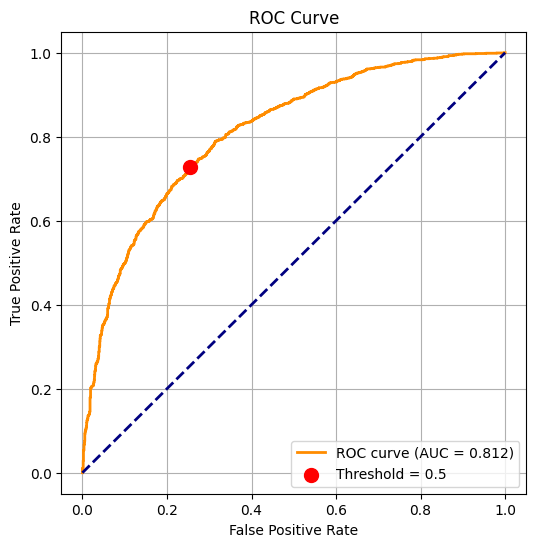

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Getting model's predictions on test data
y_pred_probs = model.predict(X_test)
y_proba = y_pred_probs.flatten() # Flatten to a 1D array

# Computing ROC curve metrics
# fpr: False Positive Rates for different thresholds
# tpr: True Positive Rates (Recall) for different thresholds
# thresholds: The probability thresholds used to calculate each (fpr, tpr) pair
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Computing AUC
roc_auc_LR = auc(fpr, tpr)

# Find and mark threshold = 0.5
threshold_value = 0.5

# Find the index of the threshold that is closest to 0.5
# np.abs computes distance from 0.5 for each threshold; np.argmin finds the index of the smallest distance
closest_idx = np.argmin(np.abs(thresholds - threshold_value))
fpr_05 = fpr[closest_idx]
tpr_05 = tpr[closest_idx]


print('ROC/AUC : ')
print()
# Plot ROC Curve with threshold=0.5 point
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_LR:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_05, tpr_05, color='red', s=100, label='Threshold = 0.5', zorder=5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Confusion Matrix Values:
TN: 1198, FP: 411, FN: 440, TP: 1169


Text(1.85, 1.85, 'TP')

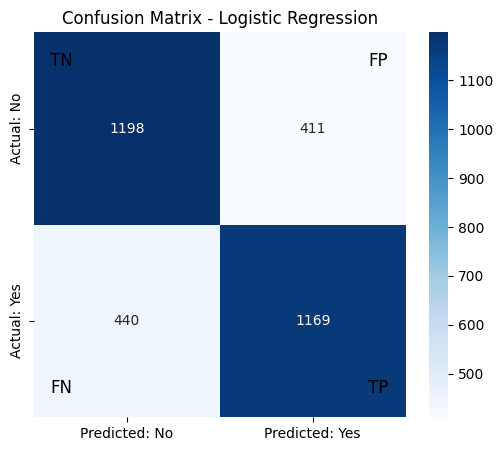

In [ ]:
#Confusion Matrix Creation

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Values:\nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
# Plot confusion matrix (TN, FP, FN, TP)
plt.figure(figsize=(6, 5))
plt.title('Confusion Matrix - Logistic Regression')
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=['Predicted: No', 'Predicted: Yes'],
                 yticklabels=['Actual: No', 'Actual: Yes'])

# Label each quadrant
ax.text(0.15, 0.15, 'TN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 0.15, 'FP', ha='center', va='center', color='black', fontsize=12)
ax.text(0.15, 1.85, 'FN', ha='center', va='center', color='black', fontsize=12)
ax.text(1.85, 1.85, 'TP', ha='center', va='center', color='black', fontsize=12)

In [ ]:
'''
TN (True Negative) = 1198 -> Model correctly predicted class 0.

FP (False Positive) = 411 -> Model predicted 1, but the actual was 0.

FN (False Negative) = 440 -> Model predicted 0, but the actual was 1.

TP (True Positive) = 1169 -> Model correctly predicted class 1.
'''

'\nTN (True Negative) = 1204 -> Model correctly predicted class 0.\n\nFP (False Positive) = 405 -> Model predicted 1, but the actual was 0.\n\nFN (False Negative) = 376 -> Model predicted 0, but the actual was 1.\n\nTP (True Positive) = 1233 -> Model correctly predicted class 1.\n'

##4.2. Model Evaluation Analysis Report

- For Class 0 prediction ; Precision = 73%, Recall = 74% and F1-score = 74%

- For Class 1 prediction ; Precision = 74%, Recall = 73% and F1-score = 73%

- Model's overall prediction accuracy is 74%

- - TN (True Negative) = 1198 -> In 1198 cases model correctly predicted class 0
- - FP (False Positive) = 411 -> In 411 cases model predicted 1, but the actual was 0
- - FN (False Negative) = 440 -> In 440 cases model predicted 0, but the actual was 1
- - TP (True Positive) = 1169 -> In 1169 cases model correctly predicted class 1

- AUC value is 84%, not bad but could be better.

- Overall model works fine to predict class 0 and class 1 but can be improved. I have worked on model tuning a lot and used various architectures even hypertuning but I wasn't able to improve prediction accuracy, so problem is not with the model but with dataset I believe.

#5. Final Report

## Data Preperation :  
- 14 columns and 9578 raws exist in the dataset

- No null values obtained in dataset

- Column 'not.fully.paid' is our target column

- There is imbalance in dataset, amount of '0' in target column is almost five times greater than amount of '1', imbalance in dataset will be resolved with Smote in future steps

##Feature Engineering and Exploratory Data Analysis :
- One-hot encoding applied for categorical 'purpose' column and boolean values converted to 0&1 to make column suitable for model training

- Correlation matrix based heatmap created to see how features correlated. Highly correlated columns should be removed to help model learn in general data but no highly correlated features found
- -  There is no highly correlated(>85%) feature found.
- -  There is 46% correlation between interest rate and revolving line utilization rate
- -  There is 45% correlation between annual income and interes rate
- -  There is negative 71% correlation between interest rate and fico score
- -  There is negative 54% correlation between credit policy and inquiries in last 6 months

- All columns scaled with StandardScaler, preprocessed dataset is ready for model training.

## Model Building :

- Model was built with neural networks in Keras sequential, five layers used with funnel architecture, relu used as activation funtion in layers and sigmoid activation funtion used in output layer

- Early stoppage added in any case of need but even with 300 epochs no auto cut occured.

- Smote and class weight techniques used to balance the data imbalance, before smote applied accuracy on test results were awful, after balancing results became much better.

- Before Smote data imbalance was class 0 : 8045 , class 1 : 1533. After Smote dataset became class 0 : 8045 , class 1 : 8045 with syntetic data added

- More layers used in funnel architecture but didn't give good results so layer count kept less

- Neuron count in layers increased/decreased in various ways, so far I got the best results with 64-32-1

- Various percentages of neuron dropping experienced, so far I got the best results with 0.3

- Various learning rate for Adam optimizer experienced, so far I got the best results with 0.001 learning rate

- I've used relu activation function in hidden layers, I used sigmoid function in output since we're looking for binary output

- 'binary_crossentropy' used as loss function, it is suitable for binary targets

- Batch size was implemented wtih 32 and 64, both gives close results so I kept 64 for speed

- Epoch size used as 300, accuracy stabilized around 300
### HyperTuning Implementation for Best Model Selection
- Various tuning variations was applied, best accuracy is 77% so far, no significant result obtained so no need to implement HyperTuning since our manual built model gives similar result.


## Model Evaluation :


- For Class 0 prediction ; Precision = 73%, Recall = 74% and F1-score = 74%

- For Class 1 prediction ; Precision = 74%, Recall = 73% and F1-score = 73%

- Model's overall prediction accuracy is 74%

- - TN (True Negative) = 1198 -> In 1198 cases model correctly predicted class 0
- - FP (False Positive) = 411 -> In 411 cases model predicted 1, but the actual was 0
- - FN (False Negative) = 440 -> In 440 cases model predicted 0, but the actual was 1
- - TP (True Positive) = 1169 -> In 1169 cases model correctly predicted class 1

- AUC value is 81%, not bad but could be better.

##Result :

###Overall my deep learning model works fine to predict class 0 and class 1 with 74% accuracy but can be improved. I have worked on model tuning a lot and used various architectures even hypertuning but I wasn't able to improve prediction accuracy, so problem is not with the model but with dataset I believe.


